# Capstone Project

#### Autor: Jinming Chen




## Introduction

NBA Draft gives the teams a chance to add talent to their rosters in the form of college talents and international prospects and sometimes even from the foreign leagues. While each and every draft is important, some are inherently more important than others. Some may just have brought a superstar into the league.

Because of the importance of the draft, this project builds machine learning models using the NBA draft datasets from 18-19 seasons to 20-21 seasons to predict whether players will be drafted. The dataset can be found at NBA.com and they are the NBA Draft Combine data. The analysis will include 21 attributes as independent variables (position, height, weight, wingspan, etc.) and a dependent variable draft.

First, I will scrape data from NBA.com and upload the data set to my Github repository. Then, we will use exploratory data analysis that will be performed on the variables to familiarize us with the combined stats attributes, identify trends and missing data, and gather preliminary predictive inferences. We will apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included in my logistic regression model, SVM model, KNN model, decision tree model, random forest model, and XG Boost classifier. I will find which model is the best at predicting which of the three new indicator values is most likely to apply to a given observation.

### Data Set Attributes
1) Season - The season that play went to NBA draft. <br>
2) player - The name of the player  <br>
3) pos - The position of the player <br>
4) body_fat - The percentage of the body fat of the player <br>
5) hand_length - The hand length of the player  <br>
6) hand_width - The hand width of the player <br>
7) height_wo_shoes -  The height of the player without shoes<br>
8) height_w_shoes - The height of the player with shoes <br>
9) standing_reach - The standing reach of the player  <br>
10) weight - The weight of the player   <br>
11) wingspan - The wingspan of the player  <br>
12) age - The age of the player <br>
13) draft - Whether the player had been drafted <br>
14) pick - The pick number of the player that had been draft <br>
15) conference - The conference that player had been played <br>
16) conference_strength - The strength of the conferece  <br>
17) points - The average points per game  <br>
18) rebounds- The average rebounds per game  <br>
19) assists - The average assists per game <br>
20) steals - The average steals per game <br>
21) FG% - The average field goal percentage per game <br>
22) 3p% - The average 3 points percentage per game   <br>

## Exploratory Data Analysis

In [1]:
#Import libraries and packages
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, preprocessing, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re


import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#Read in the csv from Github
df1821 = pd.read_csv("https://raw.githubusercontent.com/JinmingChen12/Capstone/main/NBA2018-2021.txt", sep=',')
                 
#View the data frame
df1821.head()

,Season,player,pos,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,...,draft,pick,conference,conference_strength,points,rebounds,assists,steals,FG%,3p%
0,2018-2019,Rawle Alkins,SG,8.90%,8.50,10.00,6' 2'',6' 4'',8' 3'',217.4,...,0,NaN,Pac-12,6.0,11.8,4.9,2.2,1.0,0.450,0.365
1,2018-2019,Grayson Allen,SG,5.55%,8.25,10.00,6' 3'',6' 4'',8' 1'',198.0,...,1,21.0,ACC,5.0,14.1,3.2,3.0,1.0,0.430,0.380
2,2018-2019,Kostas Antetokounmpo,PF,5.00%,9.25,9.50,6' 9'',6' 10'',9' 2'',194.8,...,1,20.0,ACC,5.0,5.2,2.9,0.4,0.2,0.574,0.133
3,2018-2019,Udoka Azubuike,C,7.95%,9.50,10.00,6' 10'',7' 0'',9' 4'',273.8,...,1,27.0,Big 12,3.0,12.3,7.9,0.7,0.5,0.416,0.000
4,2018-2019,Mohamed Bamba,C,6.20%,9.75,10.25,6' 11'',7' 0'',9' 7'',225.6,...,1,6.0,SEC,2.0,12.9,10.5,0.5,0.2,0.541,0.275


#### Convert height to centimeter

In [2]:

def feetinchtocm(feetinch):
    if feetinch != 'None':
        pattern = re.compile(r'[0-9]+')
        feetinch = re.findall(pattern, feetinch)
        return int(feetinch[0])*30.48+int(feetinch[1])*2.54
    else:
        return 'None'

In [3]:
df1821.height_wo_shoes = df1821.height_wo_shoes.apply(lambda x: feetinchtocm(x))
df1821.height_w_shoes = df1821.height_w_shoes.apply(lambda x: feetinchtocm(x))
df1821.standing_reach = df1821.standing_reach.apply(lambda x: feetinchtocm(x))
df1821.wingspan = df1821.wingspan.apply(lambda x: feetinchtocm(x))

In [4]:
df1821

,Season,player,pos,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,...,draft,pick,conference,conference_strength,points,rebounds,assists,steals,FG%,3p%
0,2018-2019,Rawle Alkins,SG,8.90%,8.50,10.00,187.96,193.04,251.46,217.4,...,0,NaN,Pac-12,6.0,11.8,4.9,2.2,1.00,0.450,0.365
1,2018-2019,Grayson Allen,SG,5.55%,8.25,10.00,190.50,193.04,246.38,198.0,...,1,21.0,ACC,5.0,14.1,3.2,3.0,1.00,0.430,0.380
2,2018-2019,Kostas Antetokounmpo,PF,5.00%,9.25,9.50,205.74,208.28,279.40,194.8,...,1,20.0,ACC,5.0,5.2,2.9,0.4,0.20,0.574,0.133
3,2018-2019,Udoka Azubuike,C,7.95%,9.50,10.00,208.28,213.36,284.48,273.8,...,1,27.0,Big 12,3.0,12.3,7.9,0.7,0.50,0.416,0.000
4,2018-2019,Mohamed Bamba,C,6.20%,9.75,10.25,210.82,213.36,292.10,225.6,...,1,6.0,SEC,2.0,12.9,10.5,0.5,0.20,0.541,0.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2020-2021,Immanuel Quickley,SG,8.20%,8.00,8.75,187.96,190.50,251.46,185.8,...,1,25.0,SEC,2.0,10.8,2.0,2.0,1.00,0.400,0.400
180,2020-2021,Josh Green,SG-SF,6.80%,8.00,8.75,193.04,195.58,256.54,214.0,...,1,18.0,Big Ten,1.0,2.3,1.9,0.7,0.33,0.441,0.148
181,2020-2021,Myles Powell,PG-SG,15.80%,8.00,9.00,182.88,185.42,251.46,194.0,...,0,NaN,ACC,5.0,2.1,1.0,0.2,0.10,0.344,0.233
182,2020-2021,Skylar Mays,SG,7.40%,8.00,9.75,190.50,193.04,251.46,204.0,...,1,50.0,Pac-12,6.0,3.5,0.9,0.8,0.30,0.466,0.357


#### Checking the null value

In [5]:
df1821.isnull().sum()

Season                  0
player                  0
pos                     0
body_fat                0
hand_length             0
hand_width              0
height_wo_shoes         0
height_w_shoes          0
standing_reach          0
weight                  0
wingspan                0
age                     0
draft                   0
pick                   59
conference              0
conference_strength     0
points                  0
rebounds                0
assists                 0
steals                  0
FG%                     0
3p%                     1
dtype: int64

#### Check the data type

In [6]:
df1821.dtypes

Season                  object
player                  object
pos                     object
body_fat                object
hand_length            float64
hand_width             float64
height_wo_shoes        float64
height_w_shoes         float64
standing_reach         float64
weight                 float64
wingspan               float64
age                      int64
draft                    int64
pick                   float64
conference              object
conference_strength    float64
points                 float64
rebounds               float64
assists                float64
steals                 float64
FG%                    float64
3p%                    float64
dtype: object

#### Convert body_fat and FG% to numerical value

In [7]:

df1821["body_fat"] = df1821["body_fat"].str.replace("%", "")

In [8]:
df1821["body_fat"] = pd.to_numeric(df1821["body_fat"])
df1821["FG%"] = pd.to_numeric(df1821["FG%"])

In [9]:
df1821

,Season,player,pos,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,...,draft,pick,conference,conference_strength,points,rebounds,assists,steals,FG%,3p%
0,2018-2019,Rawle Alkins,SG,8.90,8.50,10.00,187.96,193.04,251.46,217.4,...,0,NaN,Pac-12,6.0,11.8,4.9,2.2,1.00,0.450,0.365
1,2018-2019,Grayson Allen,SG,5.55,8.25,10.00,190.50,193.04,246.38,198.0,...,1,21.0,ACC,5.0,14.1,3.2,3.0,1.00,0.430,0.380
2,2018-2019,Kostas Antetokounmpo,PF,5.00,9.25,9.50,205.74,208.28,279.40,194.8,...,1,20.0,ACC,5.0,5.2,2.9,0.4,0.20,0.574,0.133
3,2018-2019,Udoka Azubuike,C,7.95,9.50,10.00,208.28,213.36,284.48,273.8,...,1,27.0,Big 12,3.0,12.3,7.9,0.7,0.50,0.416,0.000
4,2018-2019,Mohamed Bamba,C,6.20,9.75,10.25,210.82,213.36,292.10,225.6,...,1,6.0,SEC,2.0,12.9,10.5,0.5,0.20,0.541,0.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2020-2021,Immanuel Quickley,SG,8.20,8.00,8.75,187.96,190.50,251.46,185.8,...,1,25.0,SEC,2.0,10.8,2.0,2.0,1.00,0.400,0.400
180,2020-2021,Josh Green,SG-SF,6.80,8.00,8.75,193.04,195.58,256.54,214.0,...,1,18.0,Big Ten,1.0,2.3,1.9,0.7,0.33,0.441,0.148
181,2020-2021,Myles Powell,PG-SG,15.80,8.00,9.00,182.88,185.42,251.46,194.0,...,0,NaN,ACC,5.0,2.1,1.0,0.2,0.10,0.344,0.233
182,2020-2021,Skylar Mays,SG,7.40,8.00,9.75,190.50,193.04,251.46,204.0,...,1,50.0,Pac-12,6.0,3.5,0.9,0.8,0.30,0.466,0.357


In [10]:
#Find the count, mean, standard deviation, minimum, maximum, 25%, 50% and 75% of each variable in the dataset.
df1821.describe()

,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,wingspan,age,draft,pick,conference_strength,points,rebounds,assists,steals,FG%,3p%
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,125.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,183.000000
mean,6.465326,8.758152,9.448370,195.538587,198.810217,261.426739,211.444565,208.500870,20.559783,0.679348,33.488000,3.763587,8.648913,3.730435,1.547826,0.520196,0.447049,0.310907
std,2.274012,0.514743,0.688546,8.394779,8.427183,12.697133,23.655269,10.424791,1.190450,0.468001,16.167778,2.674476,4.965003,2.383286,1.303629,0.361896,0.089596,0.106998
min,0.000000,7.500000,7.750000,175.260000,177.800000,231.140000,167.800000,182.880000,19.000000,0.000000,4.000000,1.000000,0.500000,0.100000,0.000000,-0.400000,0.125000,0.000000
25%,5.000000,8.500000,9.000000,190.500000,193.040000,251.460000,194.800000,200.660000,20.000000,0.000000,20.000000,2.000000,4.000000,2.000000,0.600000,0.200000,0.400000,0.297000
50%,6.050000,8.750000,9.500000,195.580000,198.120000,261.620000,207.400000,208.280000,20.000000,1.000000,34.000000,3.000000,8.300000,3.300000,1.200000,0.425000,0.439000,0.333000
75%,7.600000,9.000000,10.000000,200.660000,203.835000,269.875000,225.650000,215.900000,21.000000,1.000000,48.000000,5.000000,12.300000,5.000000,2.100000,0.800000,0.489000,0.377500
max,15.800000,10.500000,11.000000,226.060000,231.140000,309.880000,303.000000,248.920000,23.000000,1.000000,59.000000,20.000000,24.200000,11.100000,8.900000,1.900000,0.746000,0.500000


#### Check the unique values

In [11]:
#Find the number of unique values for each variable
df1821.nunique(axis=0)

Season                   3
player                 174
pos                     12
body_fat                95
hand_length             13
hand_width              14
height_wo_shoes         18
height_w_shoes          17
standing_reach          24
weight                 152
wingspan                21
age                      5
draft                    2
pick                    56
conference              11
conference_strength     12
points                 108
rebounds                71
assists                 49
steals                  25
FG%                    115
3p%                     98
dtype: int64

In [12]:
df1821.dtypes

Season                  object
player                  object
pos                     object
body_fat               float64
hand_length            float64
hand_width             float64
height_wo_shoes        float64
height_w_shoes         float64
standing_reach         float64
weight                 float64
wingspan               float64
age                      int64
draft                    int64
pick                   float64
conference              object
conference_strength    float64
points                 float64
rebounds               float64
assists                float64
steals                 float64
FG%                    float64
3p%                    float64
dtype: object

#### Create lists of numerical and categorical attributes

In [13]:
col_cat=['Season', 'player', 'pos', 'draft', 'conference']

col_num=['body_fat','hand_length','hand_width','height_wo_shoes','height_w_shoes','standing_reach','weight','wingspan', 'pick',
         'age','conference_strength','points','rebounds','assists','steals','FG%','3p%']

print("# of categorical attributes:%s" %len(col_cat))
print("# of numerical attributes:%s" %len(col_num))

# of categorical attributes:5
# of numerical attributes:17


#### Histograms, Bar Charts, Boxplots and Correlation Matrix
#### Plot a histogram for each of our numerical attributes

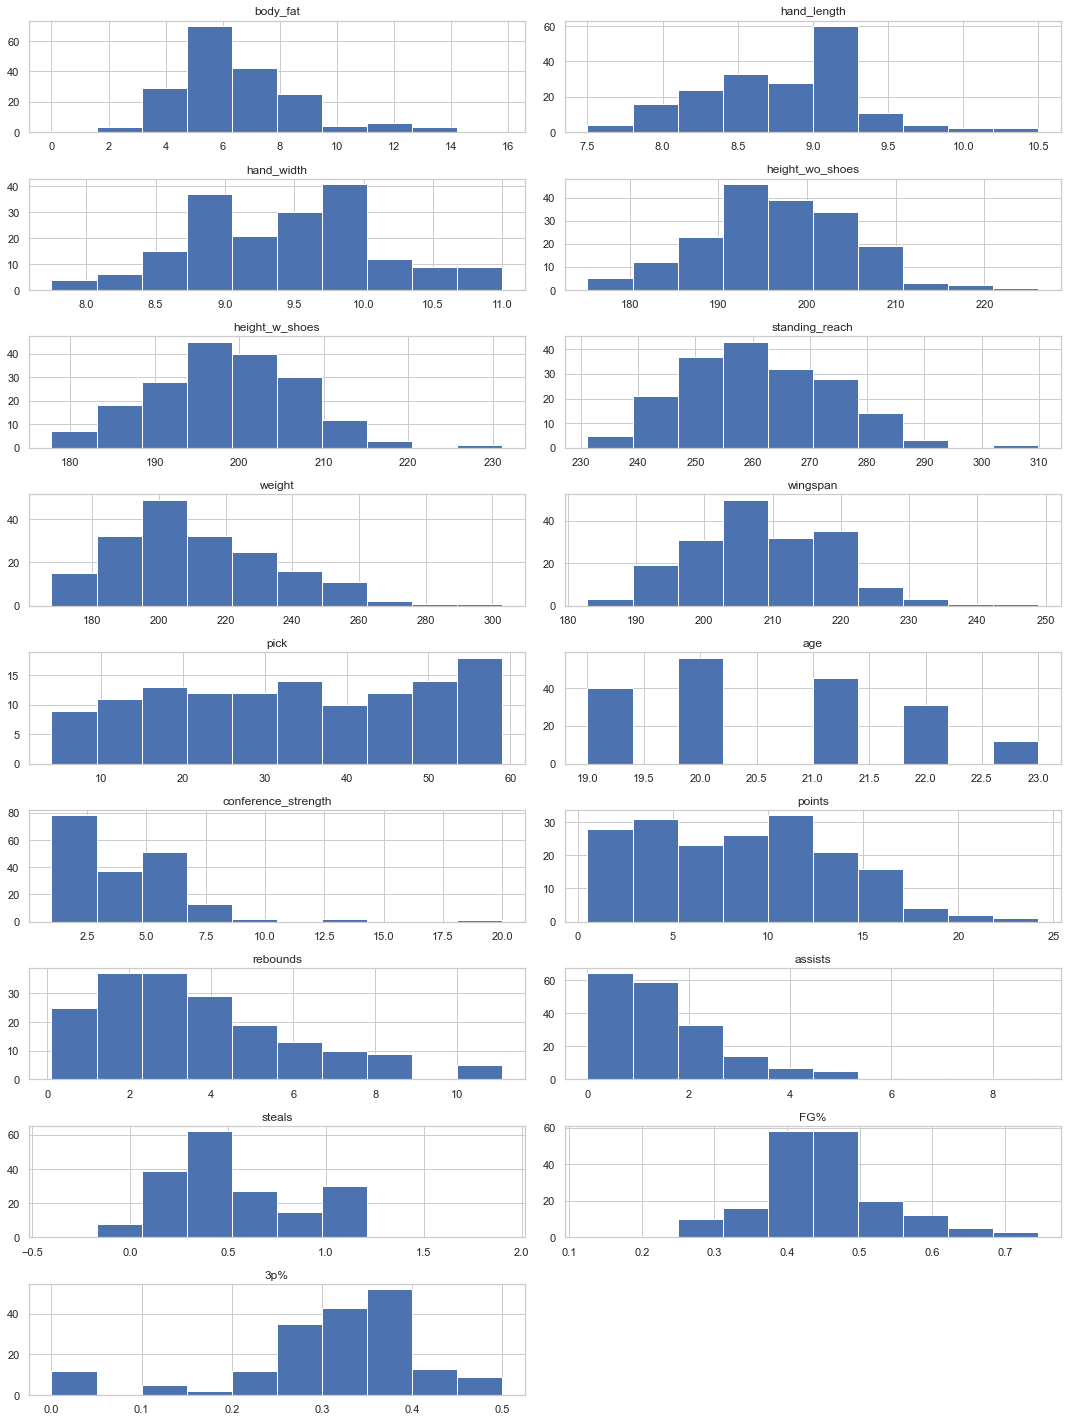

In [14]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,35)}) 

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numerical column 
for k in col_num :   
    plt.subplot(16,2,j) 
    plt.hist(df1821[k])
    plt.title('%s' %k)
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

#### Plot a box plots for each of our numerical attributes.

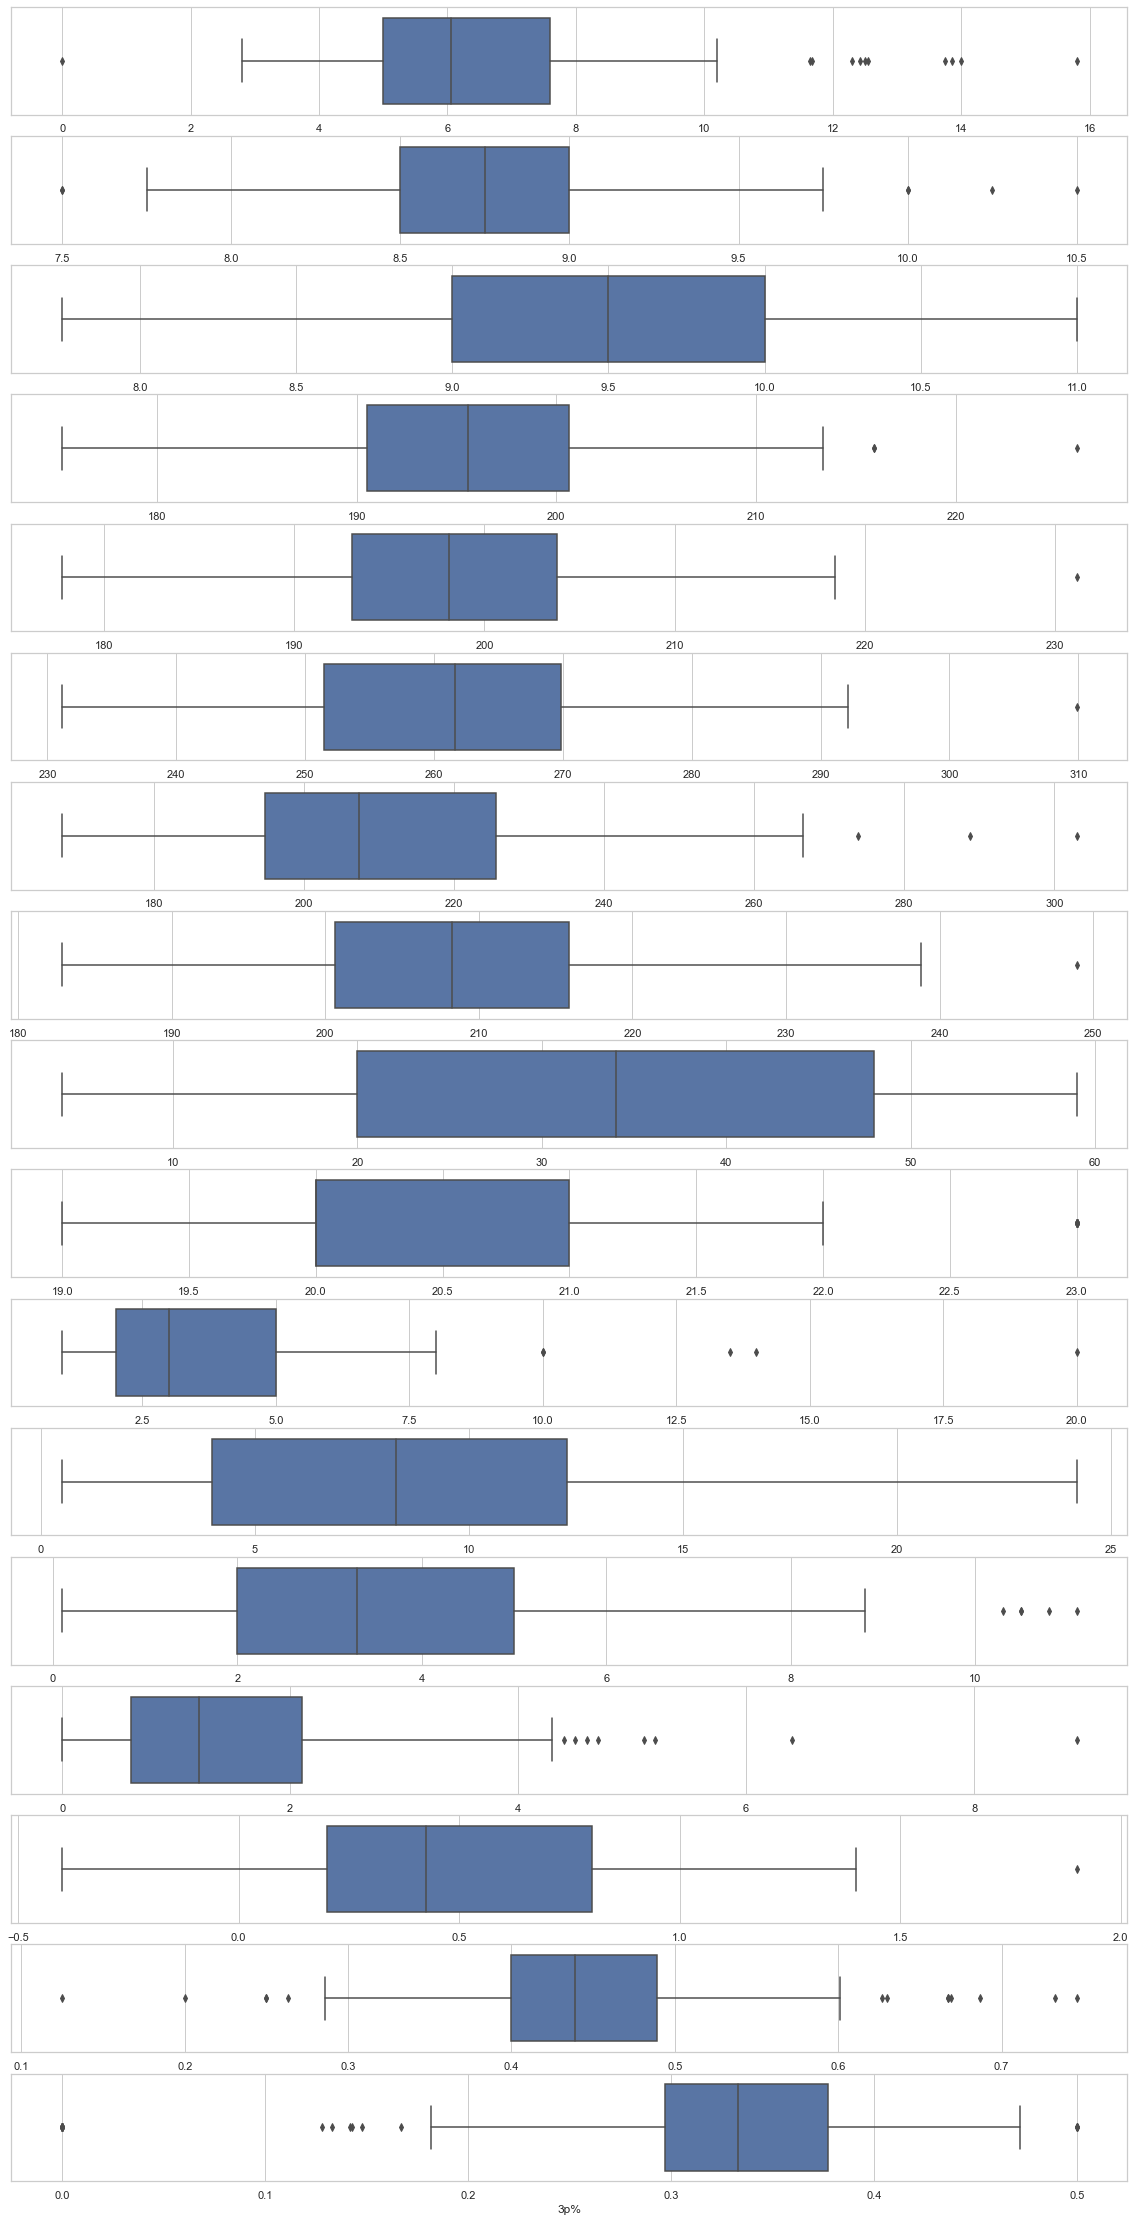

In [15]:
#Define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,40))

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numeric variable display a boxplot
for k in col_num :    
    plt.subplot(17,1,j) 
    sns.boxplot(x=k, data=df1821);
    j=j+1

#Show results    
plt.show()

Based on the histograms and box plots, the distributions of weight, conference strength, points, rebounds, and steals are right-skewed. And some of the attributes have some outliers, but in NBA draft, some outliers and skewed distribution are normal because only the top players and strong conferences will have the opportunity to play in NBA. 

#### Graph heat map for correlation

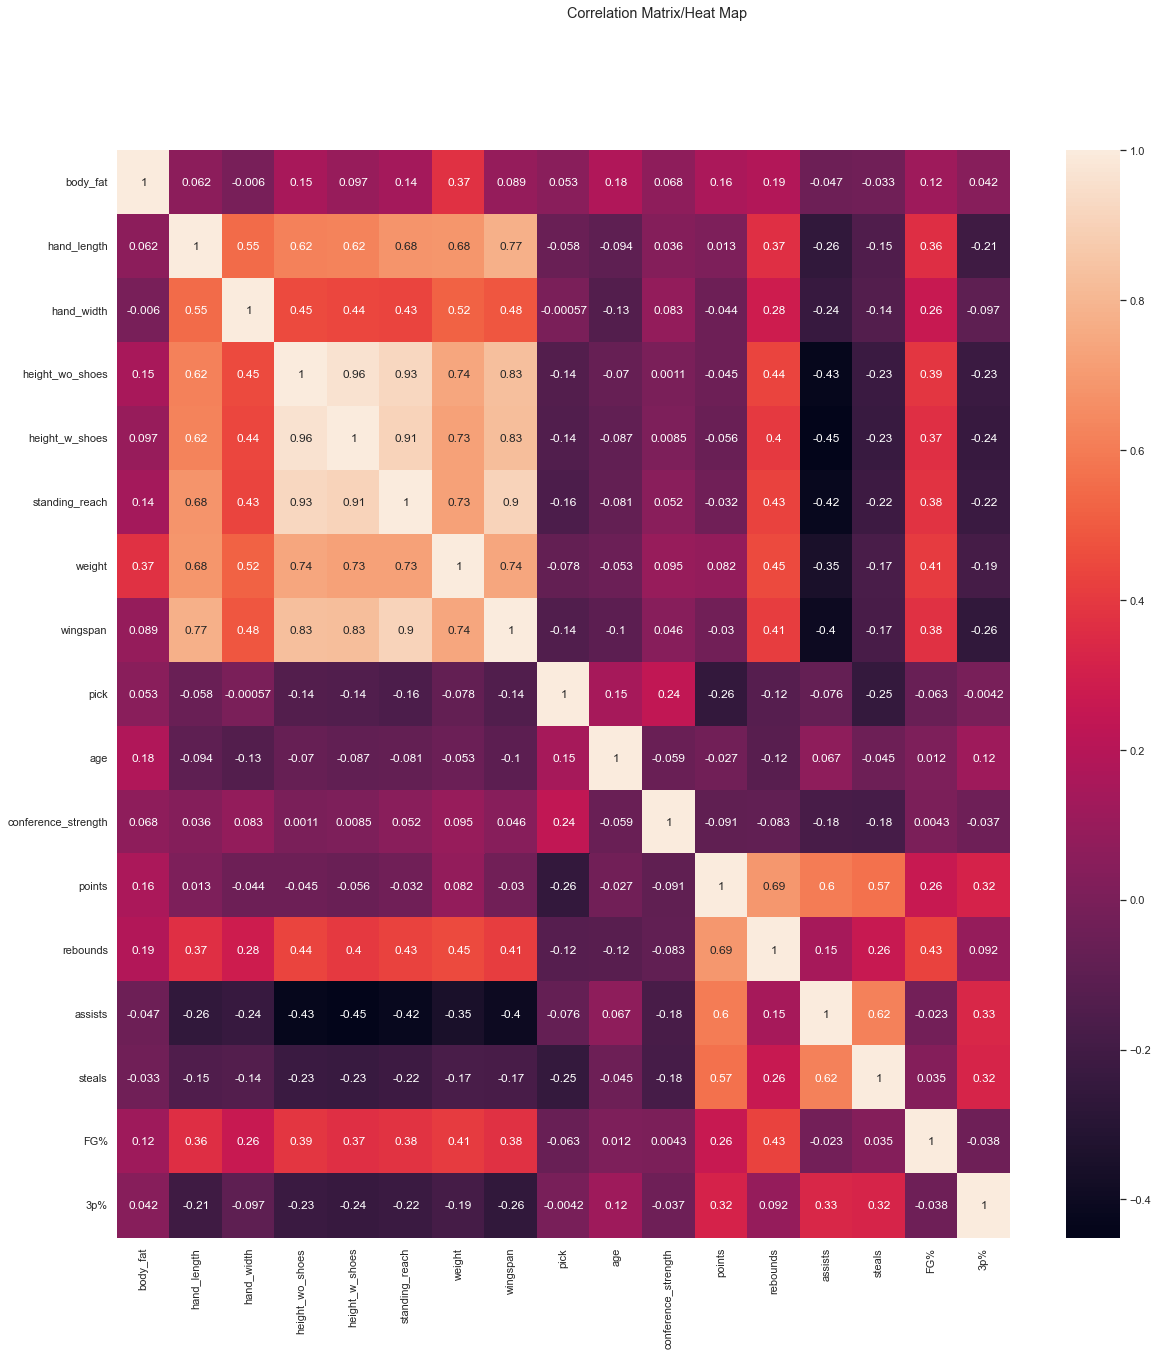

In [16]:

corr_num=df1821[col_num].corr()
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

- 1) hand_length is highly correlated with hand_width, height without shoes, height with shoes, standing reach and weight. 
- 2) hand_weight is highly correlated with hand length. 
- 3) height with shoes and height without shoes are highly correlated with each other, hand length, standing reach, weight, and wingspan. 
- 4) standing reach is highly correlated with hand length, height with/without shoes, and wingspan. 
- 5) weight is highly correlated with hand length, hand width, height with shoes, height without shoes, standing reach, wingspan. 
- 6) points is highly correlated with rebounds, assists, steals, and FG%. 

#### Plot a histogram for each of our categorical attributes

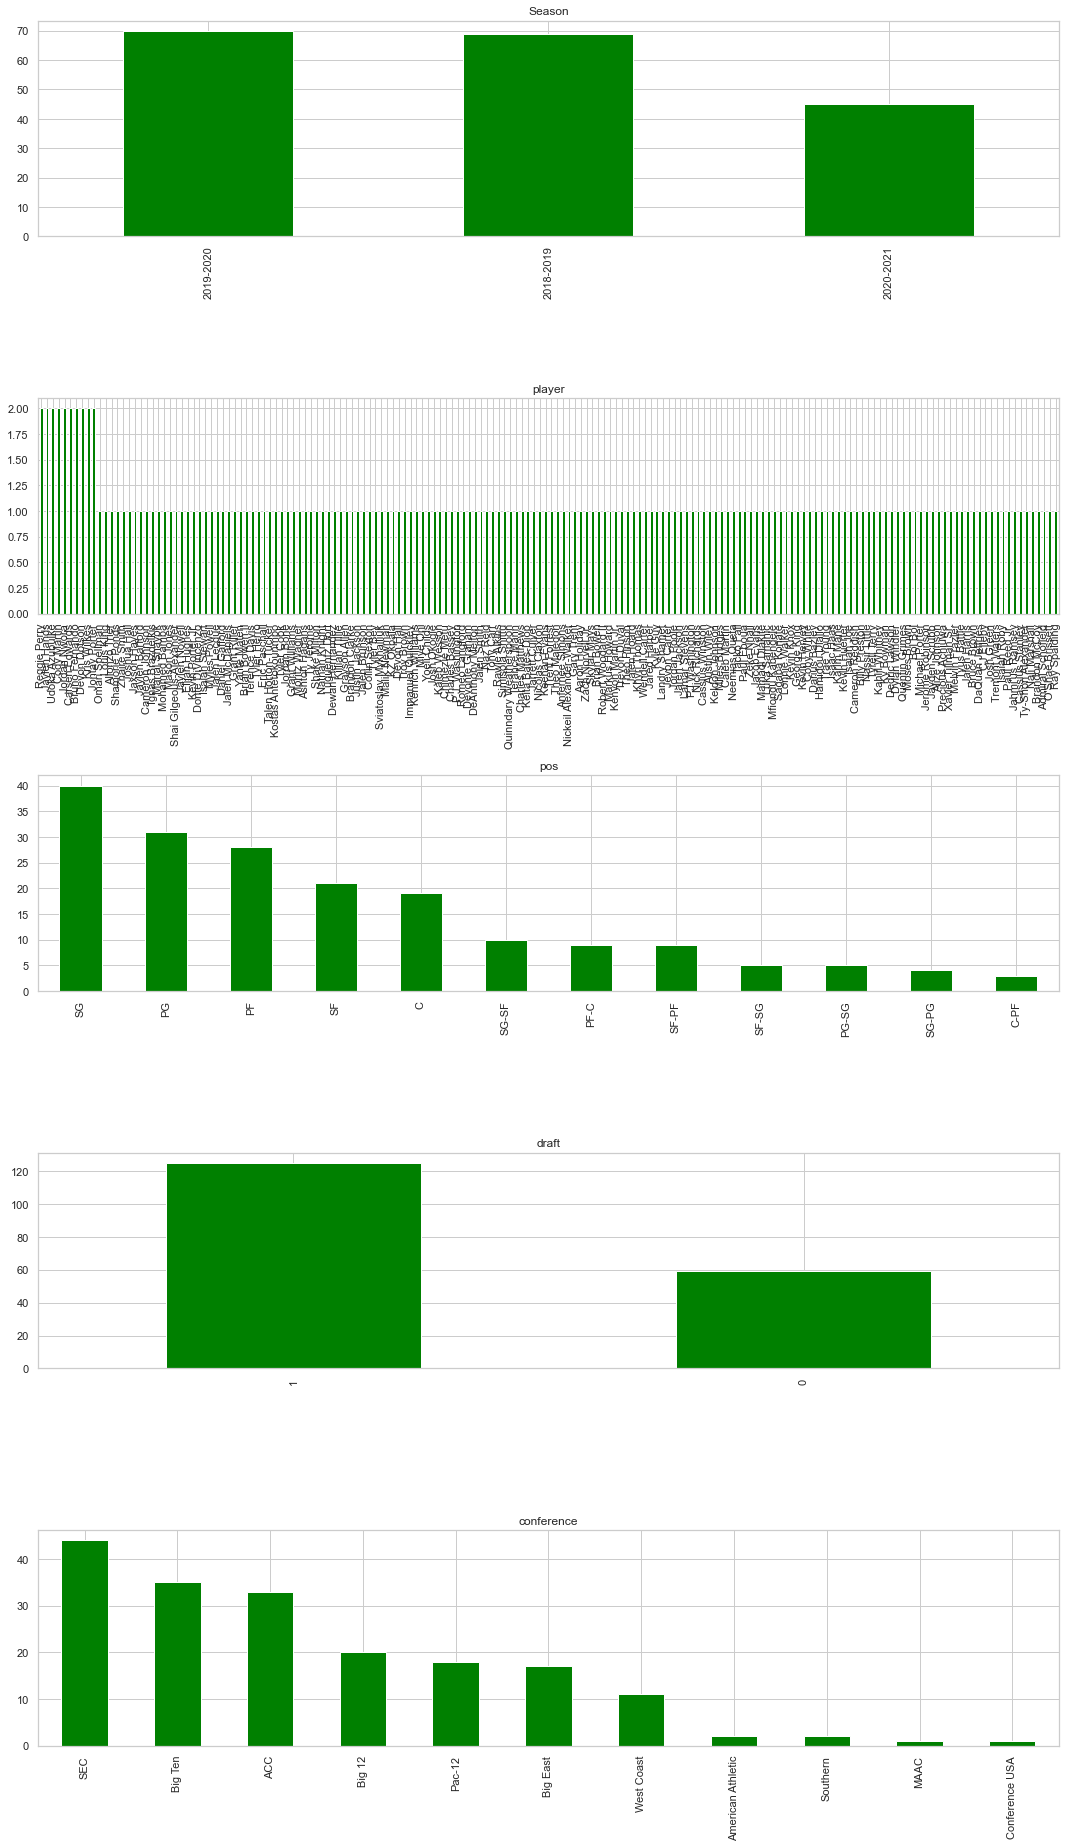

In [17]:
#Use an index to identify the spot of the subplot
j=1

#For each categorical column 
for k in col_cat :   
    plt.subplot(7,1,j) 
    df1821[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    
#Add 1 to go to the next subplot space
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()


In [14]:
#Create dummy variables for categorical variables
df2 = pd.get_dummies(df1821,columns=['Season', 'pos', 'conference'],
drop_first=False)

#Check results
df2.head()

,player,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,wingspan,age,...,conference_American Athletic,conference_Big 12,conference_Big East,conference_Big Ten,conference_Conference USA,conference_MAAC,conference_Pac-12,conference_SEC,conference_Southern,conference_West Coast
0,Rawle Alkins,8.90,8.50,10.00,187.96,193.04,251.46,217.4,203.20,20,...,0,0,0,0,0,0,1,0,0,0
1,Grayson Allen,5.55,8.25,10.00,190.50,193.04,246.38,198.0,200.66,22,...,0,0,0,0,0,0,0,0,0,0
2,Kostas Antetokounmpo,5.00,9.25,9.50,205.74,208.28,279.40,194.8,218.44,20,...,0,0,0,0,0,0,0,0,0,0
3,Udoka Azubuike,7.95,9.50,10.00,208.28,213.36,284.48,273.8,231.14,19,...,0,1,0,0,0,0,0,0,0,0
4,Mohamed Bamba,6.20,9.75,10.25,210.82,213.36,292.10,225.6,238.76,20,...,0,0,0,0,0,0,0,1,0,0


#### Create lists of numerical and categorical attributes

In [15]:
col_cat2=['Season_2018-2019',
 'Season_2019-2020',
 'Season_2020-2021',
 'pos_C',
 'pos_C-PF',
 'pos_PF',
 'pos_PF-C',
 'pos_PG',
 'pos_PG-SG',
 'pos_SF',
 'pos_SF-PF',
 'pos_SF-SG',
 'pos_SG',
 'pos_SG-PG',
 'pos_SG-SF',
 'conference_ACC',
 'conference_American Athletic',
 'conference_Big 12',
 'conference_Big East',
 'conference_Big Ten',
 'conference_Conference USA',
 'conference_MAAC',
 'conference_Pac-12',
 'conference_SEC',
 'conference_Southern',
 'conference_West Coast']

col_num2=['body_fat','hand_length','hand_width','height_wo_shoes','height_w_shoes','standing_reach','weight','wingspan', 'pick',
         'age','conference_strength','points','rebounds','assists','steals','FG%','3p%']

print("# of categorical attributes:%s" %len(col_cat2))
print("# of numerical attributes:%s" %len(col_num2))

# of categorical attributes:26
# of numerical attributes:17


### Data Preparation

In [16]:
df2.groupby('draft').mean()

,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,wingspan,age,pick,...,conference_American Athletic,conference_Big 12,conference_Big East,conference_Big Ten,conference_Conference USA,conference_MAAC,conference_Pac-12,conference_SEC,conference_Southern,conference_West Coast
draft,,,,,,,,,,,,,,,,,,,,,
0,7.199153,8.826271,9.529661,195.795254,198.808814,262.265763,213.4000,208.452203,20.745763,NaN,...,0.016949,0.016949,0.118644,0.084746,0.016949,0.016949,0.186441,0.220339,0.033898,0.101695
1,6.118960,8.726000,9.410000,195.417440,198.810880,261.030720,210.5216,208.523840,20.472000,33.488,...,0.008000,0.152000,0.080000,0.240000,0.000000,0.000000,0.056000,0.248000,0.000000,0.040000


In [17]:
# 
col_cat3=['Season_2018-2019',
 'Season_2019-2020',
 'Season_2020-2021',
 'pos_C',
 'pos_C-PF',
 'pos_PF',
 'pos_PF-C',
 'pos_PG',
 'pos_PG-SG',
 'pos_SF',
 'pos_SF-PF',
 'pos_SF-SG',
 'pos_SG',
 'pos_SG-PG',
 'pos_SG-SF',
 'conference_ACC',
 'conference_American Athletic',
 'conference_Big 12',
 'conference_Big East',
 'conference_Big Ten',
 'conference_Conference USA',
 'conference_MAAC',
 'conference_Pac-12',
 'conference_SEC',
 'conference_Southern',
 'conference_West Coast']

#Import stats module to perform chi-square
from scipy import stats

#Perform chi-square test
chi_sq=[]
for i in range(0,26):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(df2['draft'], df2[col_cat3].iloc[:,i]))[0:2],i])
    
#Chi_sq
chi_sq.sort(reverse=True)
chi_sq

[[(6.319950990402289, 0.011938692863666398), 22],
 [(6.216111781727987, 0.012659282812268953), 17],
 [(5.304668241870745, 0.021268349767189342), 19],
 [(1.7275485451160968, 0.18872427399771535), 25],
 [(1.7110731979884526, 0.1908461877398134), 24],
 [(1.6223186440677964, 0.20276878862699652), 12],
 [(1.2732842878239785, 0.2591514528057774), 2],
 [(0.7589281318057003, 0.3836641693271503), 8],
 [(0.7335050847457627, 0.3917494080994335), 0],
 [(0.7185355932203388, 0.39662468159193176), 13],
 [(0.43327782959365624, 0.5103849348178284), 7],
 [(0.3319661641227331, 0.5645036265880417), 4],
 [(0.3273444815254835, 0.5672269532782037), 18],
 [(0.2423222287161504, 0.6225338869994104), 14],
 [(0.20227030400860913, 0.6528945291359994), 10],
 [(0.14846790775215338, 0.7000038009884428), 21],
 [(0.14846790775215338, 0.7000038009884428), 20],
 [(0.14490625232103876, 0.7034514431458619), 9],
 [(0.07985312886736613, 0.7774965446680049), 6],
 [(0.05263997019929219, 0.8185315960088253), 5],
 [(0.0508055469

According to the chi-square test tells us the following columns should be the most significant categorical columns to include in our analysis:
- Column 22 - Conference_Pac-12
- Column 17 - Conference_Big 12
- Column 19 - Conference_Big Ten
- Column 25 - Conference_West Cost
- Column 24 - Conference_Southern
- Column 12 - pos_SG

#### Feature selection

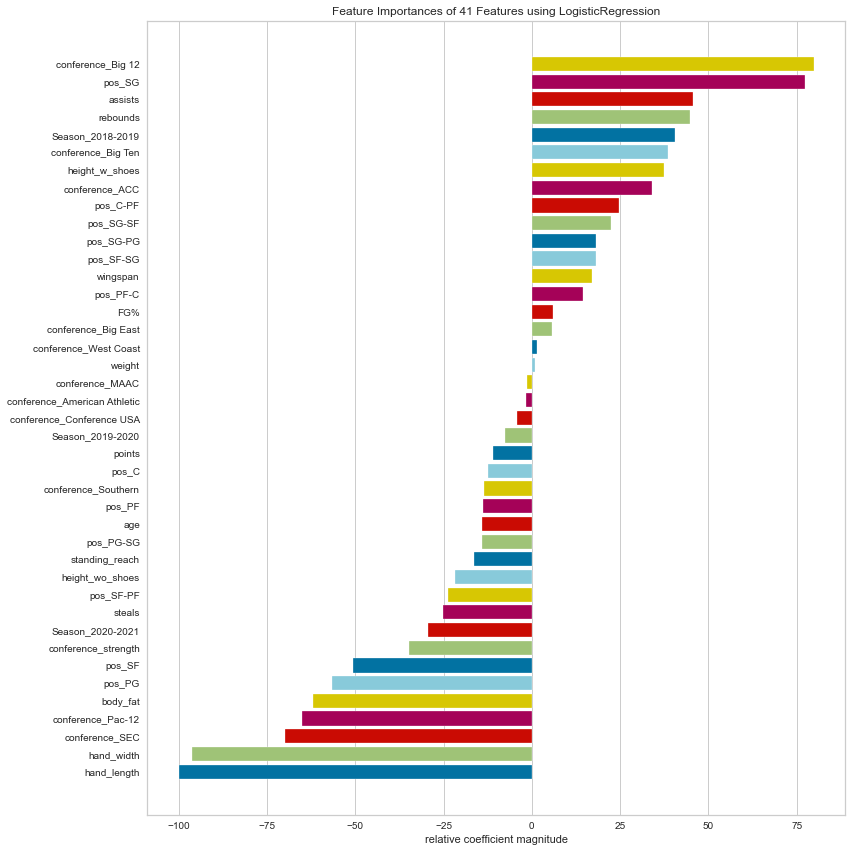

In [23]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.model_selection import FeatureImportances
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, preprocessing, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

predictors = ['body_fat','hand_length','hand_width','height_wo_shoes','height_w_shoes','standing_reach','weight','wingspan',
         'age','conference_strength','points','rebounds','assists','steals','FG%','Season_2018-2019','Season_2019-2020',
 'Season_2020-2021',
 'pos_C',
 'pos_C-PF',
 'pos_PF',
 'pos_PF-C',
 'pos_PG',
 'pos_PG-SG',
 'pos_SF',
 'pos_SF-PF',
 'pos_SF-SG',
 'pos_SG',
 'pos_SG-PG',
 'pos_SG-SF',
 'conference_ACC',
 'conference_American Athletic',
 'conference_Big 12',
 'conference_Big East',
 'conference_Big Ten',
 'conference_Conference USA',
 'conference_MAAC',
 'conference_Pac-12',
 'conference_SEC',
 'conference_Southern',
 'conference_West Coast']
X = df2[predictors]
y = df2.draft

lr = LogisticRegression(random_state=42)
fig, ax = plt.subplots(figsize=(12, 12))
fi_viz = FeatureImportances(lr)
fi_viz.fit(X, y)
fi_viz.poof()

According to the plot above, the top features: 

- conference_Big 12
- pos_SG
- assists
- rebounds
- hand_length
- hand_width
- conference_SEC
- conference_Pac-12
- body_fat
- steals
- height_w_shoes


In [19]:
predictors1 = [ 'pos_C', 'pos_C-PF','pos_PF','pos_PF-C','pos_PG','pos_PG-SG','pos_SF','pos_SF-PF',
               'pos_SF-SG','pos_SG','pos_SG-PG','pos_SG-SF','assists', 'rebounds','hand_length'] 
predictors2 = [ 'pos_C', 'pos_C-PF', 'pos_PF', 'pos_PF-C', 'pos_PG', 'pos_PG-SG', 'pos_SF', 'pos_SF-PF',
               'pos_SF-SG', 'pos_SG', 'pos_SG-PG', 'pos_SG-SF',
               'conference_ACC', 'conference_American Athletic', 'conference_Big 12', 'conference_Big East', 
               'conference_Big Ten', 'conference_Conference USA', 'conference_MAAC',
               'conference_Pac-12', 'conference_SEC', 'conference_Southern','conference_West Coast','assists', 
               'steals','hand_length','conference_strength','body_fat'] 


# Machine Learning Models 
### Model 1:  
#### Logistic Regression Model 1

In [20]:
#Define a vector containing the names of the attributes to use


X1 = df2[predictors1]
y1 = df2.draft

#Use 33% data to train 
#Use random state number 20 to make sure result is fixed 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=20)

#Define the model type as logistic regression
model = LogisticRegression()

#Train the algorithm
model.fit(X_train, y_train)

LogisticRegression()

#### Fix imbalance data and standardize the data

In [82]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 420) 
Xs_train, ys_train = sm.fit_resample(X_train, y_train.ravel())

#Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [21]:
model.score(X_train, y_train)

0.7317073170731707

In [22]:
#Predict class labels for the test set
predicted = model.predict(X_train)

#Generate class probabilities
probs = model.predict_proba(X_train)


In [23]:
#Generate evaluation metrics
from sklearn import metrics
p1 = precision_score(y_train, predicted)
f1 = f1_score(y_train, predicted)
a1 = model.score(X_train, y_train)
c1 = metrics.confusion_matrix(y_train, predicted)
cf1 = metrics.classification_report(y_train, predicted)

print("Confusion Matrix:", c1)
print("Precision:", p1) 
print("F1 score:", f1) 
print("Accuracy:", a1)
print("Classification Report:", cf1)


Confusion Matrix: [[15 29]
 [ 4 75]]
Precision: 0.7211538461538461
F1 score: 0.819672131147541
Accuracy: 0.7317073170731707
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.34      0.48        44
           1       0.72      0.95      0.82        79

    accuracy                           0.73       123
   macro avg       0.76      0.65      0.65       123
weighted avg       0.75      0.73      0.70       123



In [25]:
#Evaluate the model using 10-fold cross-validation
scores1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10)
print(scores1)
cv1 = scores1.mean()
print("cv1_scores_mean:", cv1)

C:\Users\11946\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\11946\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.61538462 0.46153846 0.53846154 0.66666667 0.75       0.75
 0.75       0.5        0.83333333 0.66666667]
cv1_scores_mean: 0.6532051282051282


Logistic Regression Model 1 has:
has 15 true negatives, 29 false positives, 4 false negatives, and 75 true positives.
- Precision is 72.1%
- F1 score is 82%
- Accuracy is 73.2%
- Recall is 73%
- Avg cross-validation is 65.3%

### Checking the null error rate

In [18]:
#Null error rate
NRE = df2.draft.value_counts()[1]/(df2.draft.value_counts()[0] + df2.draft.value_counts()[1])
NRE

0.6793478260869565

In [2]:

#Training null error rate
training1_NRE = y_train.value_counts()[1]/(y_train.value_counts()[0] + y_train.value_counts()[1])
Null_Error_Rate= 1 - training1_NRE
Null_Error_Rate

0.5000488742628132

The null error rate was previously 68.0% when "draft" was imbalanced. Now that I have applied SMOTE, the null error rate is 50% which is what I would expect.

### Model 2:  
#### Logistic Regression Model 2

In [26]:
#Define a vector containing the names of the attributes to use
X2 = df2[predictors2]
y2 = df2.draft

#Use 33% data to train 
#Use random state number 20 to make sure result is fixed 
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=20)

#Define the model type as logistic regression
model = LogisticRegression()

#Train the algorithm
model.fit(X_train, y_train)

C:\Users\11946\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
model.score(X_train, y_train)

0.7723577235772358

In [28]:
#Predict class labels for the test set
predicted = model.predict(X_train)

#Generate class probabilities
probs = model.predict_proba(X_train)

In [29]:
#Generate evaluation metrics
from sklearn import metrics
p2 = precision_score(y_train, predicted)
f2 = f1_score(y_train, predicted)
a2 = model.score(X_train, y_train)
c2 = metrics.confusion_matrix(y_train, predicted)
cf2 = metrics.classification_report(y_train, predicted)

print("Classification Report:", cf2)
print("Confusion Matrix:", c2)
print("Precision:", p2) 
print("F1 score:", f2) 
print("Accuracy:", a2)


Classification Report:               precision    recall  f1-score   support

           0       0.74      0.57      0.64        44
           1       0.79      0.89      0.83        79

    accuracy                           0.77       123
   macro avg       0.76      0.73      0.74       123
weighted avg       0.77      0.77      0.76       123

Confusion Matrix: [[25 19]
 [ 9 70]]
Precision: 0.7865168539325843
F1 score: 0.8333333333333333
Accuracy: 0.7723577235772358


In [35]:
#Evaluate the model using 10-fold cross-validation
scores2 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10)
print(scores2)
cv2 = scores2.mean()
print("cv1_scores_mean:", cv2)

[0.76923077 0.61538462 0.69230769 0.75       0.66666667 0.66666667
 0.58333333 0.58333333 0.75       0.66666667]
cv1_scores_mean: 0.6743589743589744


Logistic Regression Model 2 has:
has 25 true negatives, 19 false positives, 9 false negatives, and 70 true positives.
- Precision is 78.6%
- Recall is 77%
- F1 score is 83.3%
- Accuracy is 77.2%
- Avg cross-validation is 67.4%

### Model 3:
#### SVM model 1

In [30]:
#Response and explanatory variables
X3 = df2[predictors1]
y3 = df2.draft

#Prepare data for classification process, use 2/3rds of the data to train, 1/3rd to test, random state of 20.
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.33, random_state=20)

In [96]:
from sklearn.svm import SVC

clf1=SVC(random_state = 42, C = 100, gamma = 0.1, kernel = "rbf")
clf1.fit(X3_train, y_train)
clf1.score(X3_train, y_train)

#Print metrics
y3_train_pred = clf1.predict(X3_train)

print("Classification Report",classification_report(y_train, y3_train_pred))
print("Confusion matrix",confusion_matrix(y_train, y3_train_pred))

p3 = precision_score(y_train, y3_train_pred)
f3 = f1_score(y_train, y3_train_pred)
a3 = metrics.accuracy_score(y_train, y3_train_pred)

print("Precision:", p3)
print("F1 score:", f3) 
print("Accuracy:", a3)

Classification Report               precision    recall  f1-score   support

           0       0.97      0.80      0.88        44
           1       0.90      0.99      0.94        79

    accuracy                           0.92       123
   macro avg       0.93      0.89      0.91       123
weighted avg       0.92      0.92      0.92       123

Confusion matrix [[35  9]
 [ 1 78]]
Precision: 0.896551724137931
F1 score: 0.9397590361445785
Accuracy: 0.9186991869918699


In [38]:
#Evaluate the model using 10-fold cross-validation
scores3 = cross_val_score(clf1, X3_train, y_train, scoring='accuracy', cv=10)
print(scores3)
cv3 = scores3.mean()
print("cv_scores_mean:", cv3)

[0.61538462 0.46153846 0.61538462 0.66666667 0.58333333 0.58333333
 0.41666667 0.41666667 0.58333333 0.66666667]
cv_scores_mean: 0.5608974358974359


SVM Model 1 has: has 35 true negatives, 9 false positives, 1 false negatives, and 79 true positives.

- Precision is 90%
- Recall is 92%
- F1 score is 94%
- Accuracy is 92%
- Avg cross-validation is 56.1%

### Model 4:
#### SVM model 2

In [39]:
#Response and explanatory variables
X4 = df2[predictors2]
y4 = df2.draft

#Prepare data for classification process, use 2/3rds of the data to train, 1/3rd to test, random state of 20.
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.33, random_state=20)

In [95]:
clf2=SVC(random_state = 42, C = 100, gamma = 0.1, kernel = "rbf")
clf2.fit(X4_train, y_train)
clf2.score(X4_train, y_train)

#Print metrics
y4_train_pred = clf2.predict(X4_train)

print("Classification Report",classification_report(y_train, y4_train_pred))
print("Confusion matrix",confusion_matrix(y_train, y4_train_pred))

p4 = precision_score(y_train, y4_train_pred)
f4 = f1_score(y_train, y4_train_pred)
a4 = metrics.accuracy_score(y_train, y4_train_pred)

print("Precision:", p4)
print("F1 score:", f4) 
print("Accuracy:", a4)

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        79

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123

Confusion matrix [[44  0]
 [ 0 79]]
Precision: 1.0
F1 score: 1.0
Accuracy: 1.0


In [41]:
#Evaluate the model using 10-fold cross-validation
scores4 = cross_val_score(clf2, X4_train, y_train, scoring='accuracy', cv=10)
print(scores4)
cv4 = scores4.mean()
print("cv_scores_mean:", cv4)

[0.69230769 0.53846154 0.61538462 0.66666667 0.41666667 0.58333333
 0.58333333 0.66666667 0.5        0.5       ]
cv_scores_mean: 0.5762820512820512


SVM Model 2 has: has 44 true negatives, 0 false positives, 0 false negatives, and 79 true positives.

- Precision is 100%
- Recall is 100%
- F1 score is 100%
- Accuracy is 100%
- Avg cross-validation is 57.6%

### Model 5 
#### KNN Model 1

In [42]:
#Response and explanatory variables
X5 = df2[predictors1]
y5 = df2.draft


#Prepare data for classification process, use 2/3rds of the data to train, 1/3rd to test, random state of 20.
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.33, random_state=20)

#Create a model
KNN_Classifier = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'euclidean')

#Train the model
KNN_Classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [43]:
#Let's predict the classes for training data
y5_train_pred = KNN_Classifier.predict(X_train)

In [44]:
#Show classification metrics, confusion matrix, f1 score, and score of how well our classifier did.

print(metrics.classification_report(y_train, y5_train_pred))
print(confusion_matrix(y_train, y5_train_pred))

p5 = precision_score(y_train, y5_train_pred)
f5 = f1_score(y_train, y5_train_pred)
a5 = KNN_Classifier.score(X_train, y_train)

print("Precision:", p5) 
print("F1 score:", f5) 
print("Accuracy:", a5)

              precision    recall  f1-score   support

           0       0.75      0.48      0.58        44
           1       0.76      0.91      0.83        79

    accuracy                           0.76       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.76      0.76      0.74       123

[[21 23]
 [ 7 72]]
Precision: 0.7578947368421053
F1 score: 0.8275862068965517
Accuracy: 0.7560975609756098


In [45]:
#Evaluate the model using 10-fold cross-validation
#K is often set to a value of 5 or 10 since these values have been shown to produce testing error rate estimates that 
#exhibit neither high bias nor very high variance (see "An Introduction to Statistical Learning", page 184, James, Witten, 
#Hastie, and Tibshirani, ISBN-13: 978-1461471370).  We will use 10 for our K-fold cross validation testing.

from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_Classifier, X_train, y_train, scoring='accuracy', cv=10)
print(scores)
cv5 = scores.mean()
print("cv_scores_mean:", cv5)

[0.61538462 0.76923077 0.69230769 0.58333333 0.58333333 0.33333333
 0.58333333 0.58333333 0.83333333 0.66666667]
cv_scores_mean: 0.6243589743589744


KNN Model 1 has: has 21 true negatives, 23 false positives, 7 false negatives, and 72 true positives.

- Precision is 75.8%
- Recall is 76%
- F1 score is 82.8%
- Accuracy is 75.6%
- Avg cross-validation is 62.4%

### Model 6
#### KNN Model 2

In [46]:

#Response and explanatory variables
X6 = df2[predictors2]
y6 = df2.draft


#Prepare data for classification process, use 2/3rds of the data to train, 1/3rd to test, random state of 20.
X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size=0.33, random_state=20)

#Create a model
KNN_Classifier = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'euclidean')

#Train the model
KNN_Classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [47]:
#Let's predict the classes for training data
y6_train_pred = KNN_Classifier.predict(X_train)

In [48]:
#Show classification metrics, confusion matrix, f1 score, and score of how well our classifier did.

print(metrics.classification_report(y_train, y6_train_pred))
print(confusion_matrix(y_train, y6_train_pred))

p6 = precision_score(y_train, y6_train_pred)
f6 = f1_score(y_train, y6_train_pred)
a6 = KNN_Classifier.score(X_train, y_train)

print("Precision:", p6) 
print("F1 score:", f6) 
print("Accuracy:", a6)

              precision    recall  f1-score   support

           0       0.71      0.50      0.59        44
           1       0.76      0.89      0.82        79

    accuracy                           0.75       123
   macro avg       0.74      0.69      0.70       123
weighted avg       0.74      0.75      0.74       123

[[22 22]
 [ 9 70]]
Precision: 0.7608695652173914
F1 score: 0.8187134502923976
Accuracy: 0.7479674796747967


In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_Classifier, X_train, y_train, scoring='accuracy', cv=10)
print(scores)
cv6 = scores.mean()
print("cv_scores_mean:", cv6)

[0.84615385 0.76923077 0.69230769 0.58333333 0.58333333 0.75
 0.5        0.66666667 0.66666667 0.66666667]
cv_scores_mean: 0.6724358974358975


KNN Model 2 has: has 22 true negatives, 22 false positives, 9 false negatives, and 70 true positives.

- Precision is 76%
- Recall is 75%
- F1 score is 82%
- Accuracy is 75%
- Avg cross-validation is 67.2%


### Model 7
#### Decision Tree 1 

In [97]:
#Create decision tree and fit it to the training data
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Response and explanatory variables
X7= df2[predictors1]
y7 = df2.draft

#Prepare data for classification process, use 2/3rds of the data to train, 1/3rd to test, random state of 20.
X_train, X_test, y_train, y_test = train_test_split(X7, y7, test_size=0.33, random_state=20)


clf_dt1 = DecisionTreeClassifier(random_state=20, criterion='gini', max_depth = 15)
clf_dt1 = clf_dt1.fit(X_train, y_train)

In [101]:
#Predict
y7_train_pred = clf_dt1.predict(X_train)

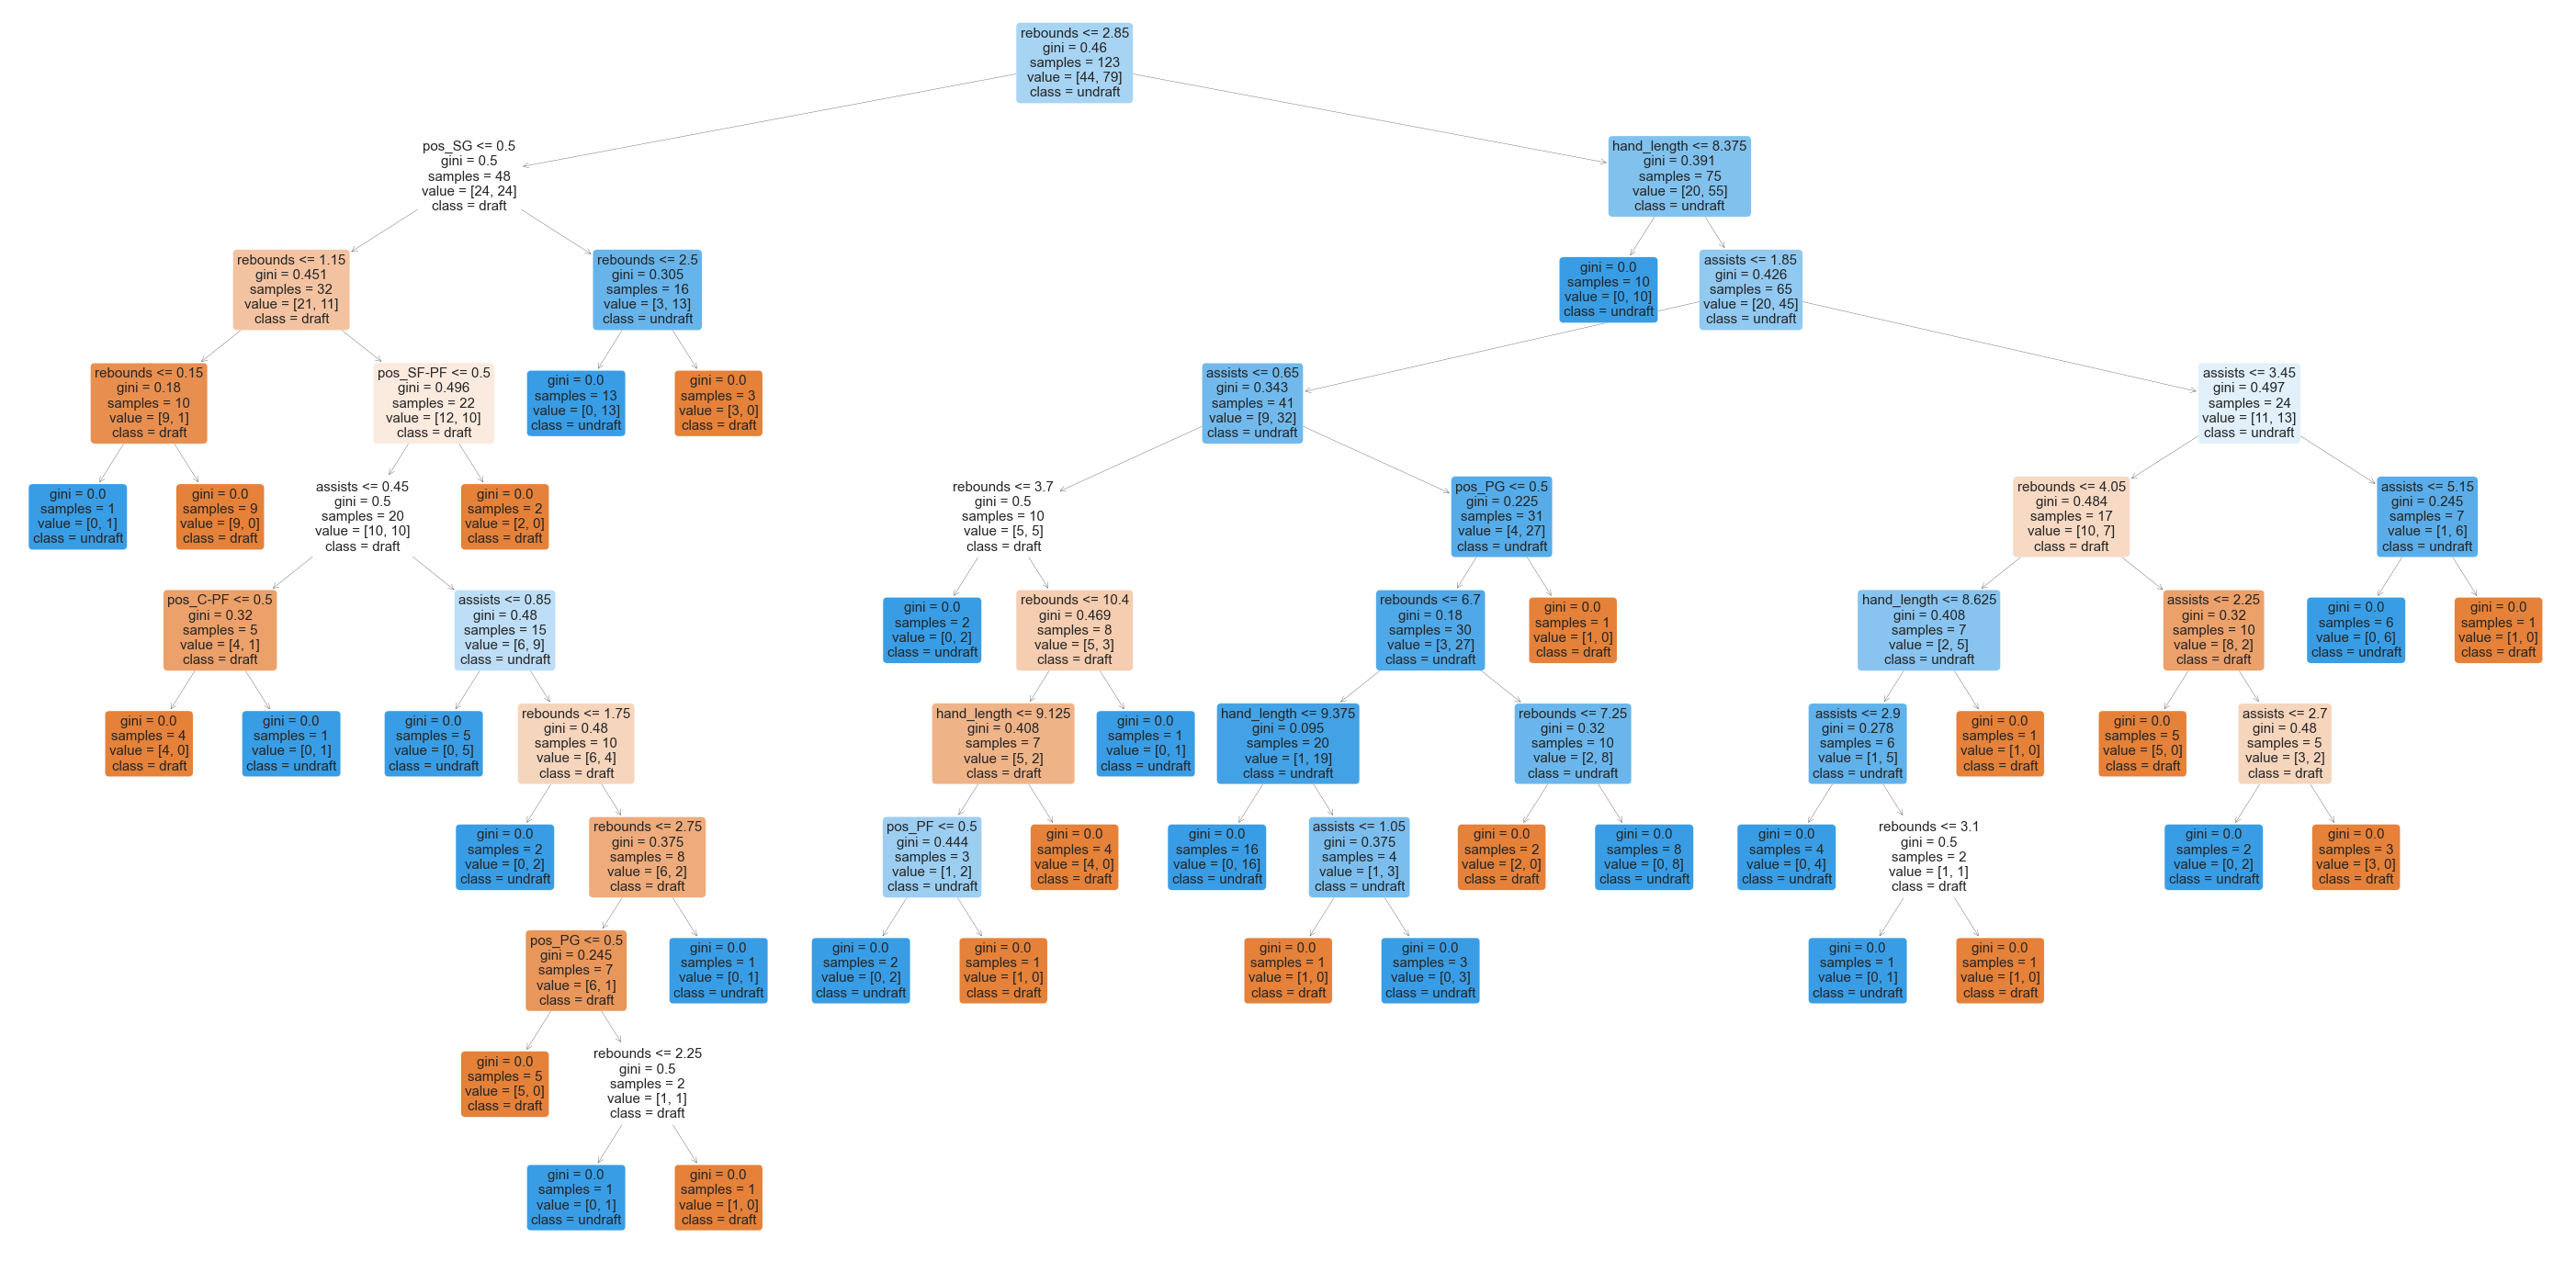

In [99]:
#Plot the tree
plt.figure(figsize = (50, 25))
tree.plot_tree(clf_dt1,
         filled=True,
         rounded=True,
         class_names=['draft', 'undraft'],
         feature_names=X_train.columns);

In [127]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, y7_train_pred)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_train, y7_train_pred, target_names=['draft', 'undraft']))

Confusion Matrix

[[44  0]
 [ 0 79]]

Classification Report

              precision    recall  f1-score   support

       draft       1.00      1.00      1.00        44
     undraft       1.00      1.00      1.00        79

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [128]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores7 = cross_val_score(clf_dt1, X_train, y_train, cv=10, scoring='accuracy')
print(scores7)
print(scores7.mean())

[0.76923077 0.61538462 0.76923077 0.66666667 0.66666667 0.66666667
 0.41666667 0.66666667 0.75       0.91666667]
0.6903846153846154


Decision Tree Model 1 has: has 22 true negatives, 22 false positives, 9 false negatives, and 70 true positives.

- Precision is 100%
- Recall is 100%
- F1 score is 100%
- Accuracy is 100%
- Avg cross-validation is 69%


### Model 8
#### Decision Tree 2 

In [131]:
X8= df2[predictors2]
y8 = df2.draft

#Prepare data for classification process, use 2/3rds of the data to train, 1/3rd to test, random state of 20.
X_train, X_test, y_train, y_test = train_test_split(X8, y8, test_size=0.33, random_state=20)


clf_dt2 = DecisionTreeClassifier(random_state=20, criterion='gini', max_depth = 15)
clf_dt2 = clf_dt1.fit(X_train, y_train)

In [132]:
#Predict
pred8 = clf_dt2.predict(X_train)

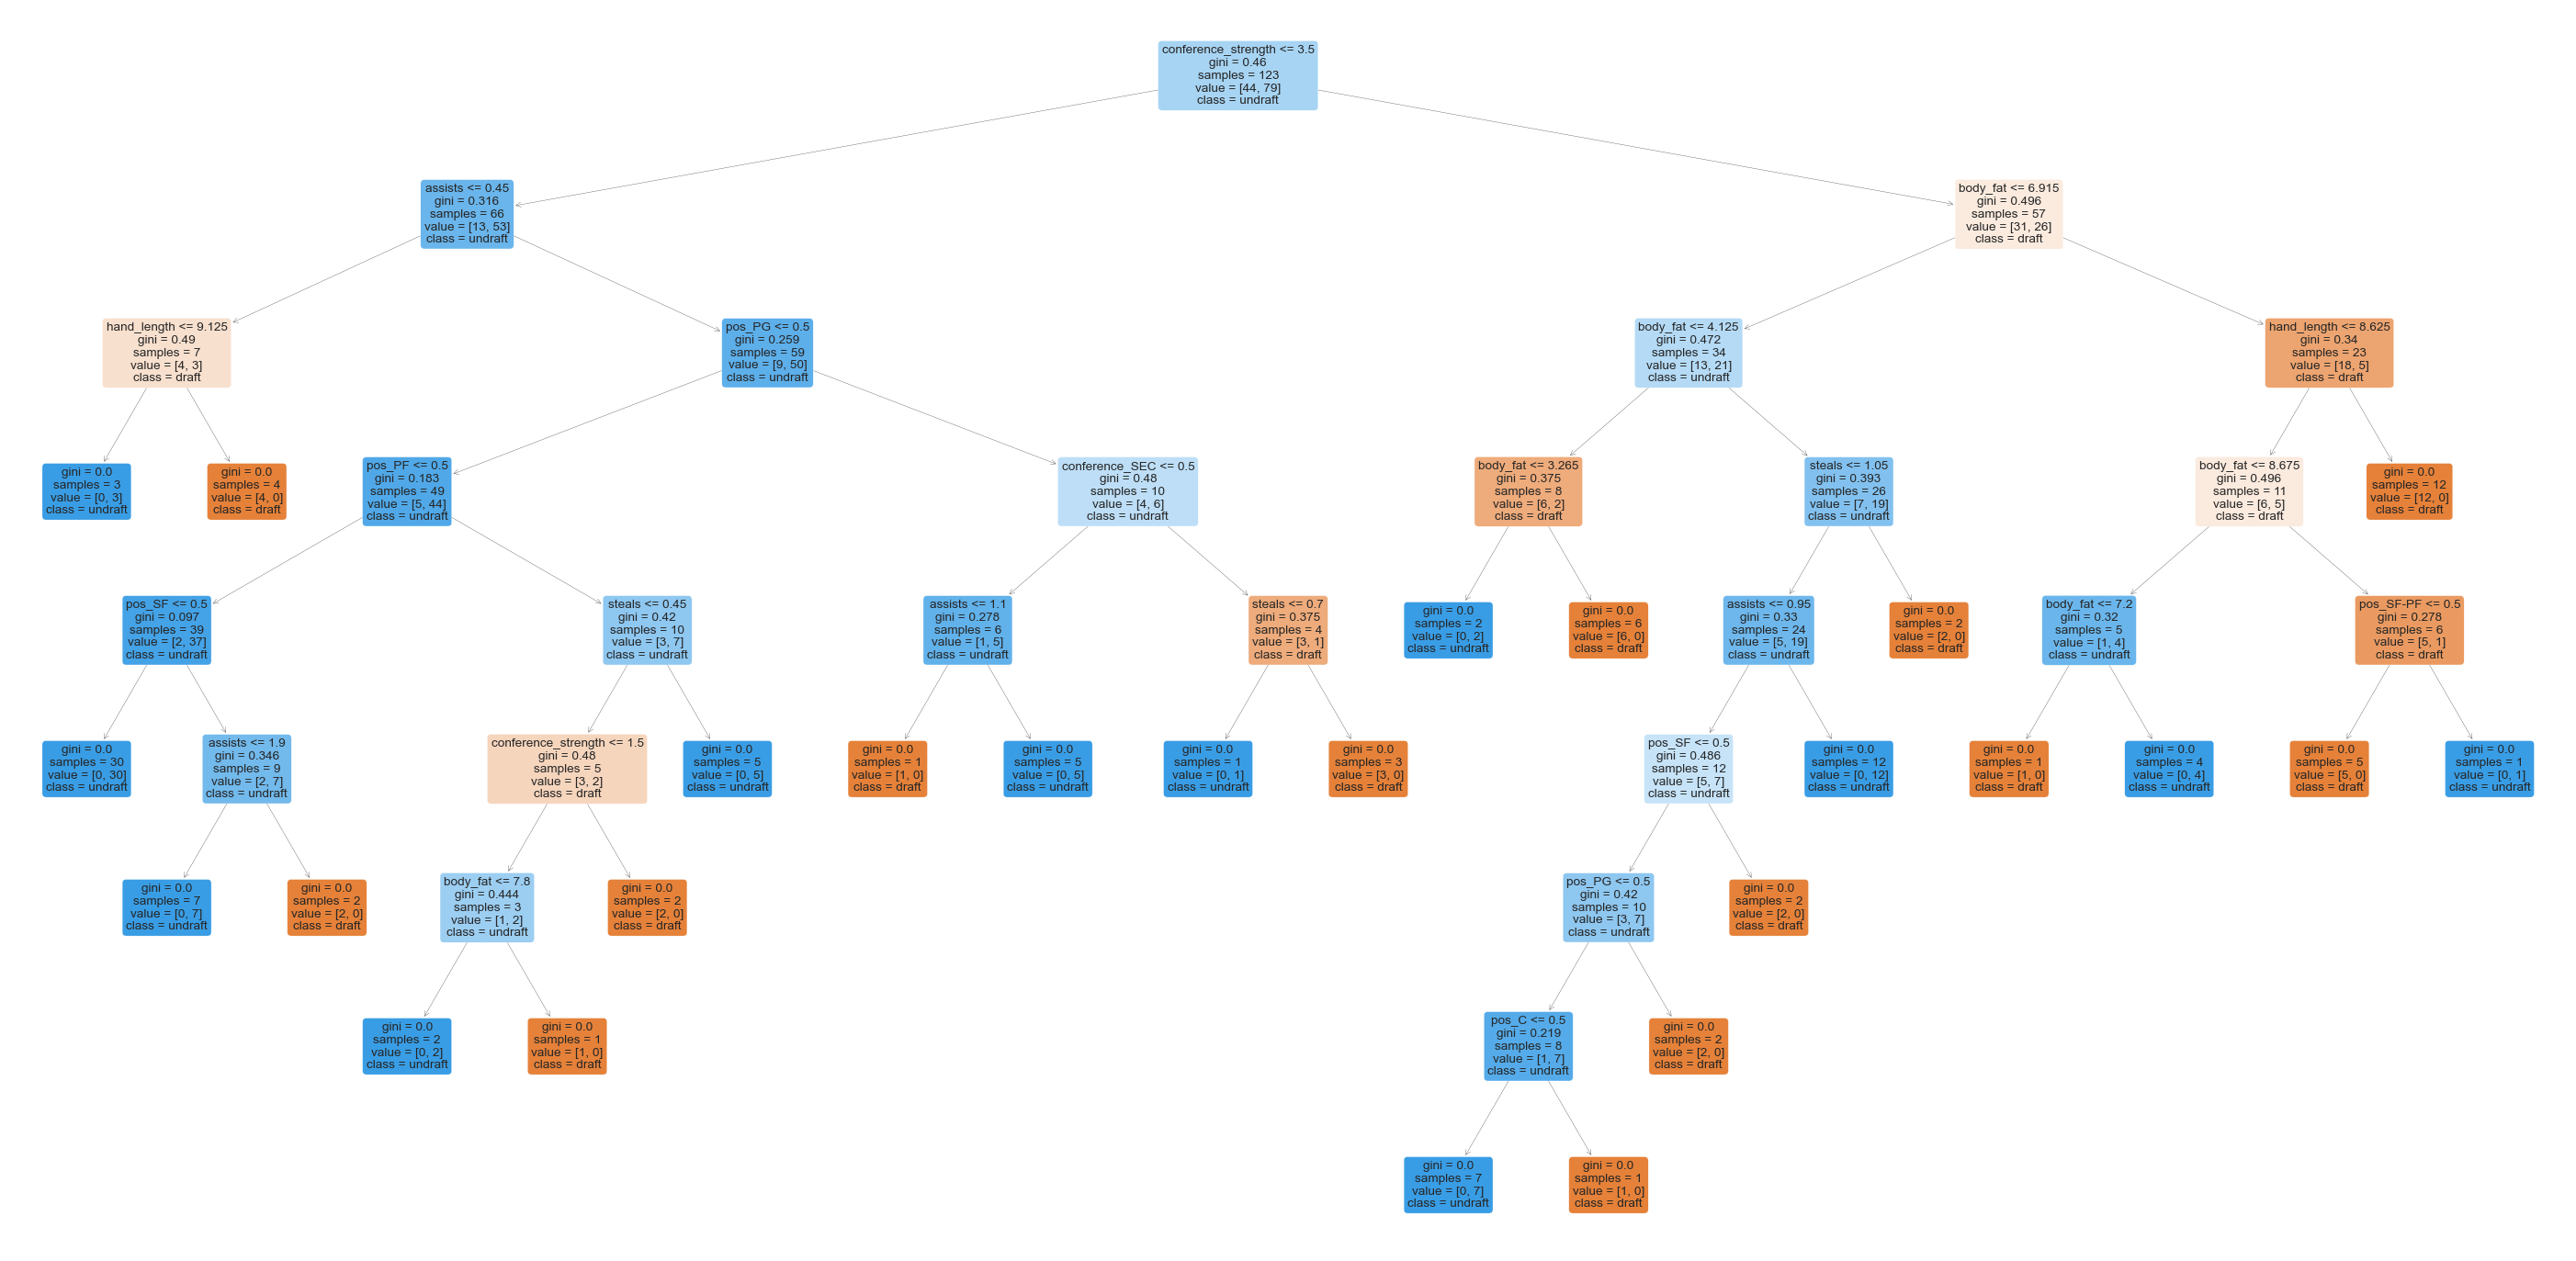

In [133]:
#Plot the tree
plt.figure(figsize = (50, 25))
tree.plot_tree(clf_dt2,
         filled=True,
         rounded=True,
         class_names=['draft', 'undraft'],
         feature_names=X_train.columns);

In [134]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, y8_train_pred)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_train, y8_train_pred, target_names=['draft', 'undraft']))

Confusion Matrix

[[44  0]
 [ 0 79]]

Classification Report

              precision    recall  f1-score   support

       draft       1.00      1.00      1.00        44
     undraft       1.00      1.00      1.00        79

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [135]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores8 = cross_val_score(clf_dt2, X_train, y_train, cv=10, scoring='accuracy')
print(scores8)
print(scores8.mean())

[0.76923077 0.61538462 0.76923077 0.66666667 0.66666667 0.66666667
 0.41666667 0.66666667 0.75       0.91666667]
0.6903846153846154


Decision Tree Model 2 has: has 22 true negatives, 22 false positives, 9 false negatives, and 70 true positives.

- Precision is 100%
- Recall is 100%
- F1 score is 100%
- Accuracy is 100%
- Avg cross-validation is 69%

### Model 9

#### Random Forest 1

In [58]:
#Create first random forest model and fit it to the training data
from sklearn.ensemble import RandomForestClassifier


#Response and explanatory variables
X9= df2[predictors1]
y9 = df2.draft

#Prepare data for classification process, use 2/3rds of the data to train, 1/3rd to test, random state of 20.
X_train, X_test, y_train, y_test = train_test_split(X9, y9, test_size=0.33, random_state=20)

rnd_clf1 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=15, random_state=420)
rnd_clf1.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=15, n_estimators=500, random_state=420)

In [59]:
#Predict
RFpred1 = rnd_clf1.predict(X_train)

In [60]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, RFpred1)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_train, RFpred1, target_names=['draft','undraft']))

Confusion Matrix

[[23 21]
 [ 0 79]]

Classification Report

              precision    recall  f1-score   support

       draft       1.00      0.52      0.69        44
     undraft       0.79      1.00      0.88        79

    accuracy                           0.83       123
   macro avg       0.90      0.76      0.78       123
weighted avg       0.87      0.83      0.81       123



In [61]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores9 = cross_val_score(rnd_clf1, X_train, y_train, cv=10, scoring='accuracy')
print(scores9)
print(scores9.mean())

[0.69230769 0.61538462 0.53846154 0.58333333 0.75       0.58333333
 0.66666667 0.5        0.75       0.66666667]
0.6346153846153847


Random Forest Model 1 has: has 23 true negatives, 21 false positives, 0 false negatives, and 79 true positives.

- Precision is 87%
- Recall is 83%
- F1 score is 81%
- Accuracy is 83%
- Avg cross-validation is 63.5%

### Model 10

#### Random Forest 2

In [31]:
#Create first random forest model and fit it to the training data
from sklearn.ensemble import RandomForestClassifier

#Response and explanatory variables
X10= df2[predictors2]
y10 = df2.draft

#Prepare data for classification process, use 2/3rds of the data to train, 1/3rd to test, random state of 20.
X_train, X_test, y_train, y_test = train_test_split(X10, y10, test_size=0.33, random_state=20)

rnd_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=15, random_state=420)
rnd_clf2.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=15, n_estimators=500, random_state=420)

In [32]:
#Predict
RFpred2 = rnd_clf2.predict(X_train)

In [33]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, RFpred2)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_train, RFpred2, target_names=['draft','undraft']))

Confusion Matrix

[[32 12]
 [ 0 79]]

Classification Report

              precision    recall  f1-score   support

       draft       1.00      0.73      0.84        44
     undraft       0.87      1.00      0.93        79

    accuracy                           0.90       123
   macro avg       0.93      0.86      0.89       123
weighted avg       0.92      0.90      0.90       123



In [34]:
#Cross validation
from sklearn.model_selection import cross_val_score
scores10 = cross_val_score(rnd_clf2, X_train, y_train, cv=10, scoring='accuracy')
print(scores10)
print(scores10.mean())

[0.76923077 0.69230769 0.53846154 0.66666667 0.75       0.66666667
 0.66666667 0.66666667 0.75       0.66666667]
0.6833333333333333


Random Forest Model 2 has: has 23 true negatives, 21 false positives, 0 false negatives, and 79 true positives.

- Precision is 92%
- Recall is 90%
- F1 score is 90%
- Accuracy is 90%
- Avg cross-validation is 68.3%

### Model 11

#### XG Boost Classifier Model 1

In [ ]:
#https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

#import xgboost as xgb

#param_grid = {
        #'silent': [False],
        #'max_depth': [6, 10, 15, 20],
        #'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        #'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        #'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        #'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        #'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        #'gamma': [0, 0.25, 0.5, 1.0],
        #'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        #'n_estimators': [100]}

#best_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid, scoring='accuracy',
                            #n_jobs=4, refit=False, cv=2)

#best_xgb.fit(X_train, y_train)

#best_score = best_xgb.best_score_
#best_params = best_xgb.best_params_
#print("Best score: {}".format(best_score))
#print("Best params: ")
#for param_name in sorted(best_params.keys()):
    #print('%s: %r' % (param_name, best_params[param_name]))

This took about 46 minutes to run with the above specifications so I have commented it out.  The results were as follows:

| Best params        |       |   |   |   |
|--------------------|-------|---|---|---|
| colsample_bylevel: | 0.7   |   |   |   |
| colsample_bytree:  | 0.9   |   |   |   |
| gamma:             | 0     |   |   |   |
| learning_rate:     | 0.1   |   |   |   |
| max_depth:         | 15    |   |   |   |
| min_child_weight   | 3.0   |   |   |   |
| n_estimators:      | 100   |   |   |   |
| reg_lambda:        | 1.0   |   |   |   |
| silent:            | False |   |   |   |
| subsample:         | 0.8   |   |   |   |

In [70]:
#Create first XGBoost Classifier and fit it to the training data using our ideal parameters.
import xgboost as xgb

xgb_clf1 = xgb.XGBClassifier(colsample_bylevel=0.7,
colsample_bytree=0.9,
gamma=0,
learning_rate=0.1,
max_depth=15,
min_child_weight=3.0,
n_estimators=100,
reg_lambda=1.0,
silent=False,
subsample=0.8,
random_state = 10)

X11= df2[predictors1]
y11 = df2.draft

#Prepare data for classification process, use 2/3rds of the data to train, 1/3rd to test, random state of 20.
X_train, X_test, y_train, y_test = train_test_split(X11, y11, test_size=0.33, random_state=20)


xgb_clf1.fit(X_train, y_train)

[15:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=3.0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, predictor='auto',
              random_state=10, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1,
              silent=False, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [71]:
#predict
xgb_clf1_pred = xgb_clf1.predict(X_train)
xgb_clf1_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [72]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, xgb_clf1_pred)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_train, xgb_clf1_pred, target_names=['draft','undraft']))

Confusion Matrix

[[28 16]
 [ 6 73]]

Classification Report

              precision    recall  f1-score   support

       draft       0.82      0.64      0.72        44
     undraft       0.82      0.92      0.87        79

    accuracy                           0.82       123
   macro avg       0.82      0.78      0.79       123
weighted avg       0.82      0.82      0.81       123



In [73]:
from sklearn.model_selection import cross_val_score
scores11 = cross_val_score(xgb_clf1, X_train, y_train, cv=10, scoring='accuracy')
print(scores11)
print(scores11.mean())

[15:56:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:56:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:56:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

XGBoost Classifier 1: has 28 true negatives, 16 false positives, 6 false negatives, and 73 true positives.

- Precision is 82%
- Recall is 82%
- F1 score is 82%
- Accuracy is 82%
- Avg cross-validation is 65%

### Model 12

#### XG Boost Classifier Model 2

In [77]:
#Create second XGBoost Classifier and fit it to the training data using our ideal parameters.
import xgboost as xgb

xgb_clf2 = xgb.XGBClassifier(colsample_bylevel=0.7,
colsample_bytree=0.9,
gamma=0,
learning_rate=0.1,
max_depth=15,
min_child_weight=3.0,
n_estimators=100,
reg_lambda=1.0,
silent=False,
subsample=0.8,
random_state = 10)

X12= df2[predictors2]
y12 = df2.draft

#Prepare data for classification process, use 2/3rds of the data to train, 1/3rd to test, random state of 20.
X_train, X_test, y_train, y_test = train_test_split(X12, y12, test_size=0.33, random_state=20)


xgb_clf2.fit(X_train, y_train)

[15:57:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:57:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=3.0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, predictor='auto',
              random_state=10, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1,
              silent=False, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [78]:
#predict
xgb_clf2_pred = xgb_clf2.predict(X_train)
xgb_clf2_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [79]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, xgb_clf1_pred)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_train, xgb_clf1_pred, target_names=['draft','undraft']))

Confusion Matrix

[[33 11]
 [ 5 74]]

Classification Report

              precision    recall  f1-score   support

       draft       0.87      0.75      0.80        44
     undraft       0.87      0.94      0.90        79

    accuracy                           0.87       123
   macro avg       0.87      0.84      0.85       123
weighted avg       0.87      0.87      0.87       123



In [80]:
from sklearn.model_selection import cross_val_score
scores12 = cross_val_score(xgb_clf2, X_train, y_train, cv=10, scoring='accuracy')
print(scores12)
print(scores12.mean())

[15:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

XGBoost Classifier 2: has 33 true negatives, 11 false positives, 5 false negatives, and 74 true positives.

- Precision is 87%
- Recall is 87%
- F1 score is 87%
- Accuracy is 87%
- Avg cross-validation is 68.1%

### A summary of all the models' performance can be seen below: 


| Metrics                    |LG 1 |LG 2 |SVM 1|SVM 2|KNN 1|KNN 2|DT 1  |DC 2  |RF 1  |RF 2  |XG 1  |XG 2  |
|----------------------------|-----|-----|-----|-----|-----|-----|------|------|------|------|------|------|
| Number of Features         |15   |27   |15   |27   |15   | 27  |15    |27    |15    |27    |15    | 27   |
| Precision                  |72.1 |78.6 |90.0 |100.0|75.8 | 76.0|100.0 |100.0 |87.0  |92.0  |82.0  |  87.0|
| Recall                     |73.0 |77.0 |92.0 |100.0|76.0 | 75.0|100.0 |100.0 |83.0  |90.0  |82.0  |87.0  |
| F1 Score                   |82.0 |83.3 |94.0 |100.0|82.8 | 82.0|100.0 |100.0 |81.0  |90.0  |82.0  |87.0  |
| Accuracy                   |73.2 |77.2 |92.0 |100.0|75.6 | 75.0|100.0 |100.0 |83.0  |90.0  |82.0  |87.0  |
| Cross-validation           |65.3 |67.4 |56.1 |57.6 |62.4 | 67.2| 69.0 |69.0  |63.5  |68.3  |65.0  |68.1  |

## Model Selection

According to all the models' performance, I select the second model of the Random Forest model because it has decent performance and it is not overfitting. Moreover, it has good score on accuracy and recall. 

From a player's perspective, the accuracy score is more important because the NCAA player wants to make sure whether he will be drafted so he can make a better decision about his career, such as staying in NCAA and playing one more season or going to a foreign league. 

From GM or Coach's perspective, the recall score is more important because the resource of the NBA draft is so limited and valuable. If a GM drafts a player who does not qualify for the team or does not reach the expectation, it could harm the team in the long term and short term. The cost of false negatives is very high, so the recall score will be the most important measurement for the model. 

In [38]:
#Predict values using test data and second Random Forest model.
predsm = rnd_clf2.predict(X_test)

In [40]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,predsm)
print('Confusion Matrix\n')
print(confusion)

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, predsm, target_names=['draft','undraft']))

Confusion Matrix

[[ 2 13]
 [ 6 40]]

Classification Report

              precision    recall  f1-score   support

       draft       0.25      0.13      0.17        15
     undraft       0.75      0.87      0.81        46

    accuracy                           0.69        61
   macro avg       0.50      0.50      0.49        61
weighted avg       0.63      0.69      0.65        61



In [41]:
from sklearn.model_selection import cross_val_score
scoresF = cross_val_score(rnd_clf2, X_test, y_test, cv=10, scoring='accuracy')
print(scoresF)
print(scoresF.mean())

[0.57142857 0.66666667 0.66666667 0.33333333 0.66666667 0.83333333
 0.66666667 0.83333333 0.83333333 0.83333333]
0.6904761904761905


The second model of Random Forest: has 2 true negatives, 13 false positives, 6 false negatives, and 40 true positives.

- Precision is 63%
- Recall is 69%
- F1 score is 65%
- Accuracy is 69%
- Avg cross-validation is 69.0%

## Conclusion

After preparing our data, I found the best results came from random forest model 2 which utilized conference, position, assists, steals, hand_length, conference_strength, and body_fat. 

The training data produced an accuracy, precision, recall, and F1 score at least 90%.The random forest model 2 did fairly well at predicting whether the player will be drafted. When it was applied to the previously unseen testing data, it had a precision is 63%, recall is 69%, F1 score is 65%, accuracy is 69%, and Average cross-validation is 69.0%. It not as good as apply into the training data. 

In the future study, I would love to build a bigger dataset to reduce the bias and create more feature to improve the performace of the model. 

## Reference: 

1. https://www.nba.com/stats/draft/combine-anthro/?SeasonYear=2020-21 
2. https://www.warrennolan.com/basketball/2021/conferencenet
3. From college to the NBA: what determines a player’s success and what characteristics are NBA franchises overlooking?: Applied Economics Letters: Vol 25, No 5 (tandfonline.com) 
4. The Ranking Prediction of NBA Playoffs Based on Improved PageRank Algorithm (hindawi.com) 
5. Anchoring bias in the evaluation of basketball players: A closer look at NBA draft decision‐making - Berger - 2021 - Managerial and Decision Economics - Wiley Online Library 
6. Left atrial size and strain in elite athletes: A cross‐sectional study at the NBA Draft Combine - Cheema - 2020 - Echocardiography - Wiley Online Library 